# 1. Introduction
Building a model to predict how capable each applicant is of repaying a loan, so that sanctioning loan only for the applicants who are likely to repay the loan.

# 2. Importing requires packages

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables & Encoder
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os
import gc
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns



# 3. Retrieving the Data

In [2]:
# List files available
print(os.listdir("../input/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'EDA.json', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


# 4. Exploration of  Data.

In [3]:
# Training data
app_train = pd.read_csv('../input/application_train.csv')
app_test = pd.read_csv('../input/application_test.csv')
pd.set_option('display.max_columns', None)

print('Training data shape: {}, Testing data shape: {}'.format( app_train.shape,app_test.shape))

Training data shape: (307511, 122), Testing data shape: (48744, 121)


## 4.1 Merge both train and test dataset

In [4]:
df = app_train
df = df.append(app_test)
df.head(10)

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE,HOUR_APPR_PROCESS_START,HOUSETYPE_MODE,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,0.0252,0.0369,0.0369,0.0383,0,1.0,M,0.0143,0.0144,0.0144,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.00,0.00,0.0000,No,0.0690,0.0690,0.0690,0.083037,0.262949,0.139376,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,Y,1,0,0.0833,0.0833,0.0833,0.1250,0.1250,0.1250,reg oper account,10,block of flats,0.0369,0.0375,0.0377,0,0,0.0202,0.0205,0.022,0.0190,0.0193,0.0198,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,0.0000,0.0000,0.0,0.0000,0.00,0.0,2.0,2.0,Laborers,Business Entity Type 3,NaN,0.018801,2,2,0,0,0,0,100002,1.0,0.0149,"Stone, brick",WEDNESDAY,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0959,0.0968,0.0924,0.0529,0.0529,0.0538,0,2.0,F,0.0605,0.0608,0.0497,-16765,-1188,-291,-828.0,-1186.0,0.0,0.0,0.08,0.08,0.0806,No,0.0345,0.0345,0.0345,0.311267,0.622246,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,N,1,0,0.2917,0.2917,0.2917,0.3333,0.3333,0.3333,reg oper account,11,block of flats,0.0130,0.0132,0.0128,0,0,0.0773,0.0787,0.079,0.0549,0.0558,0.0554,Cash loans,Higher education,Married,House / apartment,State servant,Family,0.0039,0.0039,0.0,0.0098,0.01,0.0,1.0,1.0,Core staff,School,NaN,0.003541,1,1,0,0,0,0,100003,0.0,0.0714,Block,MONDAY,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,M,NaN,NaN,NaN,-19046,-225,-2531,-815.0,-4260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.555912,0.729567,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,Y,Y,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Revolving loans,Secondary / secondary special,Single / not married,House / apa

In [5]:
df.describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,HOUR_APPR_PROCESS_START,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
count,356219.000000,3.562550e+05,3.559770e+05,3.562550e+05,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000,176307.000000,176307.000000,176307.000000,148671.000000,148671.000000,148671.000000,356255.000000,356253.000000,107895.000000,107895.000000,107895.000000,356255.000000,356255.000000,356255.000000,356254.000000,356255.000000,355205.000000,355205.000000,167175.000000,167175.000000,167175.000000,177848.000000,177848.000000,177848.000000,162345.000000,3.555870e+05,286622.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.00000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,179914.000000,179914.000000,179914.000000,115147.000000,115147.000000,115147.000000,356255.000000,145411.000000,145411.000000,145411.000000,356255.000000,356255.000000,113276.000000,113276.000000,113276.000000,178353.000000,178353.000000,178353.000000,109394.000000,109394.000000,109394.000000,160489.000000,160489.000000,160489.000000,355205.000000,355205.000000,121014.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,307511.000000,185200.000000,183392.000000,183392.000000,183392.000000,119949.000000,119949.000000,119949.000000
mean,27425.560657,5.877674e+05,5.280200e+05,1.701161e+05,0.006281,0.005808,0.231697,0.304399,0.029995,1.911564,0.118138,0.118549,0.114914,0.088673,0.088178,0.087750,0.414316,2.151858,0.045045,0.044994,0.042930,-16041.248841,64317.231413,-3002.071163,-978.580852,-4983.593527,0.143452,0.100198,0.079819,0.078930,0.075346,0.150015,0.149494,0.145471,0.501965,5.148900e-01,0.509350,0.998170,0.000020,0.003537,0.000006,0.003043,0.002535,0.001044,0.008570,0.00023,0.007231,0.000514,0.000036,0.000438,0.000289,0.720504,0.000084,0.015065,0.087976,0.000171,0.082346,0.003977,0.071213,0.818498,0.999994,0.27

We can see there are some anamolies in  `DAYS_EMPLOYED`at max seems to have very large positive value.


In [6]:
print('Merged  data shape: {}, '.format( df.shape))

Merged  data shape: (356255, 122), 


## 4.2 Removing Outlier




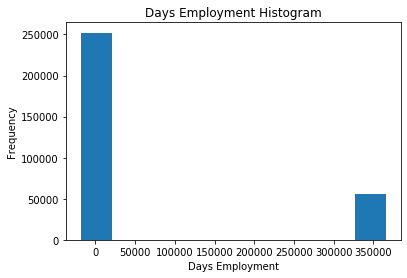

In [7]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

365243 days is somewhat around 1000 years. So, its best for us to replace it by NaN.

In [8]:
# NaN values for DAYS_EMPLOYED: 365.243 -> nan
df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

## 4.3 Categorical Variables . Type of Objects in Columns 

In [9]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [10]:
print (df['CODE_GENDER'].value_counts())

F      235126
M      121125
XNA         4
Name: CODE_GENDER, dtype: int64


`CODE_GENDER` has unknown value 'XNA'. Its better to remove these 4 rows.

In [11]:

# Remove the rows with XNA value in CODE_GENDER
print ('\nSize Before {}'.format(df.shape))
df = df[df['CODE_GENDER'] != 'XNA']
print ('Size After {}'.format(df.shape))


Size Before (356255, 122)
Size After (356251, 122)


## 4.4 Data Encoder

In [12]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print ('{} variable are label encoded'.format(le_count))
print ('The shape of dataset before One hot encoding: {}'.format(df.shape))

# One Hot Encoding 
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
df = pd.get_dummies(df, columns= categorical_columns, dummy_na= True)
print ('The shape of dataset after One hot encoding: {}'.format(df.shape))

4 variable are label encoded
The shape of dataset before One hot encoding: (356251, 122)
The shape of dataset after One hot encoding: (356251, 253)


In [13]:
df.head(10)

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,HOUR_APPR_PROCESS_START,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_nan,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATIO

In [14]:
df.describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,HOUR_APPR_PROCESS_START,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_nan,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATIO

## 4.5 Additional feature variables
This Additional Features may useful for Predictions

- DAYS_EMPLOYED_PERC: the percentage of the days employed relative to the client's age.
- INCOME_CREDIT_PERC: the percentage of the credit amount relative to a client's income.
- INCOME_PER_PERSON : the percentage of income per person.
- ANNUITY_INCOME_PERC: the percentage of the loan annuity relative to a client's income.
- PAYMENT_RATE : the percentage of rate of payment annually.

In [15]:
df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

## Target Column Distribution 
The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

In [16]:
app_train = pd.read_csv('../input/application_train.csv')

app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

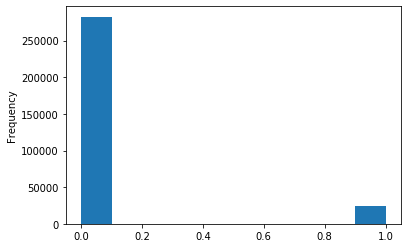

In [17]:
app_train['TARGET'].astype(int).plot.hist();

more loans that were repaid on time than loans that were not repaid. 

## Garbage Collection


Here we are using **Manual Garbage Collection** For Memory Efficient



In [18]:
del app_test, app_train
gc.collect()

6014

If you wish not to use GC then better watch your RAM. It is likely to over-exceed and Kernel error may come up.

## Handling Categorical Features

In [19]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

In [20]:
# # factorize the categorical features from train and test data
# df_cats = _get_categorical_features(df)
# df = _factorize_categoricals(df, df_cats)

# 5. Exploration of Bureau and Bureau_data

In [21]:
bureau = pd.read_csv('../input/bureau.csv', nrows = None)
bb = pd.read_csv('../input/bureau_balance.csv', nrows = None)

## 5.1 One Hot Encoding

In [22]:
bereau_cats = _get_categorical_features(bureau)
bb_cats = _get_categorical_features(bb)

bureau = _get_dummies(bureau,bereau_cats)
bb = _get_dummies(bb,bb_cats)

In [23]:
bureau.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## 5.2 Feature Engineering - Bureau Data

In [24]:
# Average Values for all bureau features 
bureau_avg = bureau.groupby('SK_ID_CURR').mean() #This line creates the hierarchical frame.

bureau_avg['buro_count'] = bureau[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['b_' + f_ for f_ in bureau_avg.columns]
df = df.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')
#df.head()
del bb, bureau_avg
gc.collect()

20

In [25]:
bureau_avg = bureau.groupby('SK_ID_CURR').mean()
bureau_avg.head(10)


,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,5.896633e+06,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,0.00000,0.0,-93.142857,3545.357143,0.428571,0.0,0.571429,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002,6.153272e+06,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,7997.14125,0.0,-499.875000,0.000000,0.250000,0.0,0.750000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100003,5.885878e+06,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,202500.00000,0.0,-816.000000,NaN,0.250000,0.0,0.750000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,6.829134e+06,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,0.00000,0.0,-532.000000,NaN,0.000000,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100005,6.735201e+06,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,0.00000,0.0,-54.333333,1420.500000,0.666667,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100007,5.987200e+06,-1149.000000,0.0,-783.000000,-783.000000,0.000,0.0,146250.000000,0.000000,0.00000,0.0,-783.000000,NaN,0.000000,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100008,6.491433e+06,-757.333333,0.0,-391.333333,-909.000000,0.000,0.0,156148.500000,80019.000000,0.00000,0.0,-611.000000,NaN,0.333333,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100009,5.651005e+06,-1271.500000,0.0,-794.937500,-1108.500000,0.000,0.0,266711.750000,76953.535714,0.00000,0.0,-851.611111,NaN,0.222222,0.0,0.777778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.888889,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100010,5.576631e+06,-1939.500000,0.0,-119.500000,-1138.000000,NaN,0.0,495000.000000,174003.750000,0.00000,0.0,-578.000000,NaN,0.500000,0.0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. Exploration of Previous Application

In [26]:
prev = pd.read_csv('../input/previous_application.csv', nrows = None)

## 6.1 Handling Outliers

In [27]:
prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

## 6.2 One Hot Encoding

In [28]:
prev_app_cats = _get_categorical_features(prev)
prev = _get_dummies(prev, prev_app_cats)

## 6.3 Feature Engineering - Previous Application

In [29]:
## count the number of previous applications for a given ID
prev_apps_count = prev[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
prev['SK_ID_PREV'] = prev['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])

## Average values for all other features in previous applications
prev_apps_avg = prev.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['p_' + col for col in prev_apps_avg.columns]
df = df.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')

## Garbage Collection
del prev, prev_apps_avg
gc.collect()

20

# 7. Exploration of POS Cash Balance

In [30]:
pos = pd.read_csv('../input/POS_CASH_balance.csv', nrows = None)

## 7.1 One Hot Encoding

In [31]:
pos_cats = _get_categorical_features(pos)
pos = _get_dummies(pos, pos_cats)

## 7.2 Feature Engineering - POS Cash Balance

In [32]:
### count the number of pos cash for a given ID
pos_count = pos[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pos['SK_ID_PREV'] = pos['SK_ID_CURR'].map(pos_count['SK_ID_PREV'])

## Average Values for all other variables in pos cash
pos_avg = pos.groupby('SK_ID_CURR').mean()
df = df.merge(right=pos_avg.reset_index(), how='left', on='SK_ID_CURR')


del pos, pos_avg
gc.collect()

0

# 8. Exploration of Installment Payments

In [33]:
ins = pd.read_csv('../input/installments_payments.csv', nrows = None)

## 8.1 One Hot Encoding

In [34]:
ins_cats = _get_categorical_features(ins)
ins = _get_dummies(ins, ins_cats)

## 8.2 Adding some new features

In [35]:
# Percentage and difference paid in each installment (amount paid and installment value)
ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']

# Days past due and days before due (no negative values)
ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)

## 8.3 Feature Engineering - Installment Payments

In [36]:
## count the number of previous installments
cnt_inst = ins[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
ins['SK_ID_PREV'] = ins['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])

## Average values for all other variables in installments payments
avg_inst = ins.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['i_' + f_ for f_ in avg_inst.columns]
df = df.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')

del ins, avg_inst
gc.collect()

33

# 9. Exploration of Credit Card

In [37]:
cc = pd.read_csv('../input/credit_card_balance.csv', nrows = None)

## 9.1 One Hot Encoding

In [38]:
ccbal_cats = _get_categorical_features(cc)
credit_card_balance = _get_dummies(cc, ccbal_cats)

## 9.2 Feature Engineering - Credit Card

In [39]:
### count the number of previous applications for a given ID
nb_prevs = credit_card_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
credit_card_balance['SK_ID_PREV'] = credit_card_balance['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

### average of all other columns 
avg_cc_bal = credit_card_balance.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ for f_ in avg_cc_bal.columns]
df = df.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')

del cc, avg_cc_bal
gc.collect()

0

In [40]:
df.describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,HOUR_APPR_PROCESS_START,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_nan,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATIO

In [41]:
df.head(10)

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,HOUR_APPR_PROCESS_START,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_nan,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATIO

In [42]:
df.shape

(356251, 512)

In [43]:
#df.to_json('../input/EDA.json')

In [44]:
list(df.columns.values)


['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17

In [45]:
df.describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,HOUR_APPR_PROCESS_START,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_nan,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATIO

# Examine the Distribution of the Target Column

In [46]:
df['TARGET'].value_counts()

0.0    282682
1.0     24825
Name: TARGET, dtype: int64

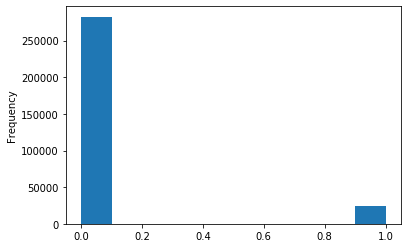

In [47]:
df['TARGET'].plot.hist();


In [48]:
df.dtypes.value_counts()


float64    326
uint8      143
int64       39
int32        4
dtype: int64

# Effect of Age on Repayment

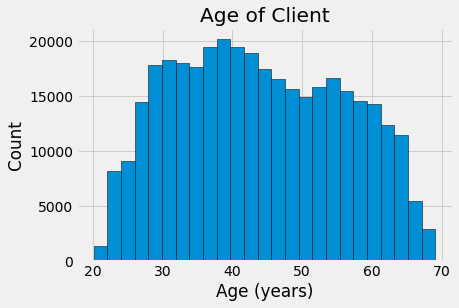

In [49]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');


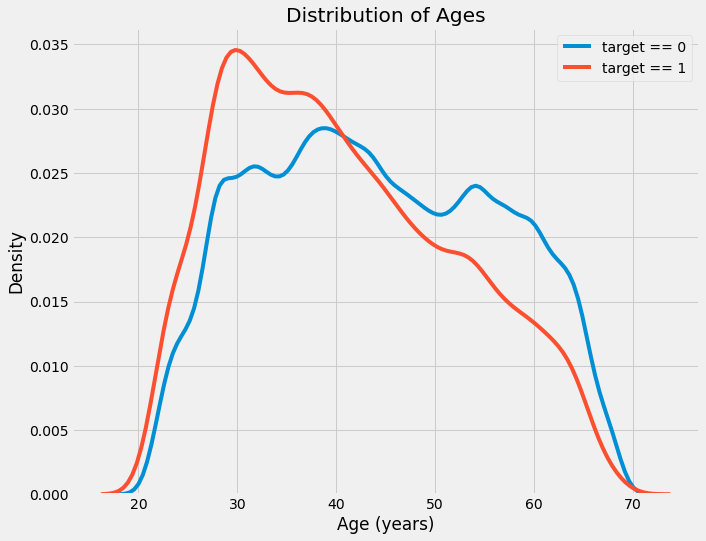

In [50]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [51]:
# Age information into a separate dataframe
age_data = df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = df['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1.0,-9461,25.920548,"(25.0, 30.0]"
1,0.0,-16765,45.931507,"(45.0, 50.0]"
2,0.0,-19046,52.180822,"(50.0, 55.0]"
3,0.0,-19005,52.068493,"(50.0, 55.0]"
4,0.0,-19932,54.608219,"(50.0, 55.0]"
5,0.0,-16941,46.413699,"(45.0, 50.0]"
6,0.0,-13778,37.747945,"(35.0, 40.0]"
7,0.0,-18850,51.643836,"(50.0, 55.0]"
8,0.0,-20099,55.065753,"(55.0, 60.0]"
9,0.0,-14469,39.641096,"(35.0, 40.0]"


In [52]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,-8538.378305,23.392817
"(25.0, 30.0]",0.111442,-10158.553997,27.831655
"(30.0, 35.0]",0.102814,-11856.378412,32.483229
"(35.0, 40.0]",0.089416,-13708.090454,37.556412
"(40.0, 45.0]",0.078491,-15497.596332,42.459168
"(45.0, 50.0]",0.074171,-17323.579317,47.461861
"(50.0, 55.0]",0.066968,-19193.920120,52.586083
"(55.0, 60.0]",0.055316,-20982.126230,57.485277
"(60.0, 65.0]",0.052737,-22779.717434,62.410185


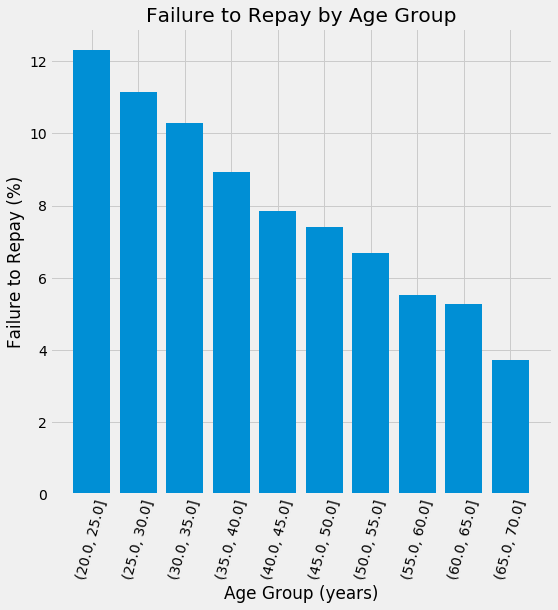

In [53]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

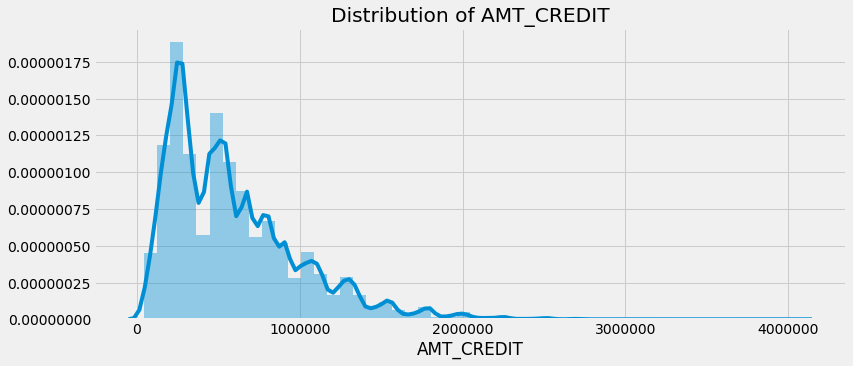

In [54]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(df["AMT_CREDIT"])

In [55]:
temp = df["TARGET"].value_counts()
print(temp)


0.0    282682
1.0     24825
Name: TARGET, dtype: int64


Float64Index([0.0, 1.0], dtype='float64')
[282682  24825]


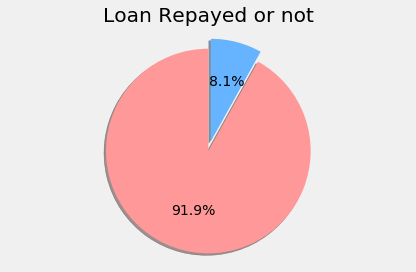

In [56]:
temp = df["TARGET"].value_counts()
dff = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
print(temp.index)
print(temp.values)


fig1,ax1 = plt.subplots()
explode = (0, 0.1)  
colors = ['#ff9999','#66b3ff']

ax1.pie(temp.values, autopct='%1.1f%%',explode=explode,colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Loan Repayed or not')
plt.tight_layout()

plt.show()


Int64Index([0, 1], dtype='int64')
[326537  29714]


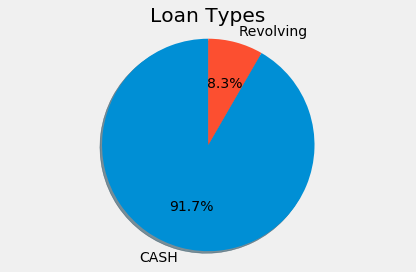

In [57]:
temp = df["NAME_CONTRACT_TYPE"].value_counts()
dff = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
print(temp.index)
print(temp.values)


fig1,ax1 = plt.subplots()

ax1.pie(temp.values, autopct='%1.1f%%',labels=['CASH','Revolving'],
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Loan Types')
plt.tight_layout()

plt.show()


Int64Index([0, 1], dtype='int64')
[235233 121018]


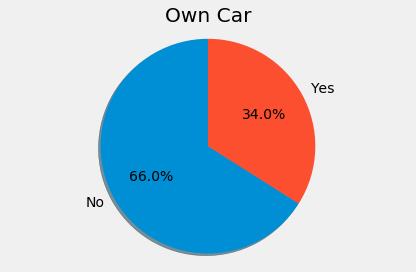

In [58]:
temp = df["FLAG_OWN_CAR"].value_counts()
dff = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
print(temp.index)
print(temp.values)


fig1,ax1 = plt.subplots()

ax1.pie(temp.values, autopct='%1.1f%%',labels=['No','Yes'],
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Own Car')
plt.tight_layout()

plt.show()


Int64Index([1, 0], dtype='int64')
[246966 109285]


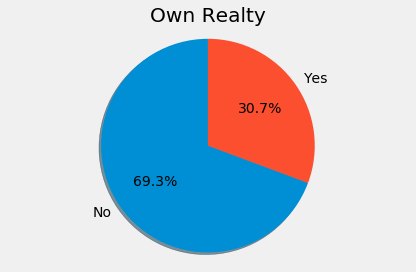

In [59]:
temp = df["FLAG_OWN_REALTY"].value_counts()
dff = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
print(temp.index)
print(temp.values)


fig1,ax1 = plt.subplots()

ax1.pie(temp.values, autopct='%1.1f%%',labels=['No','Yes'],
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Own Realty')
plt.tight_layout()

plt.show()

In [60]:
def remove_prefix(text, prefix):
    return text[len(prefix):] if text.startswith(prefix) else text

[11, 83018, 5, 64635, 25235, 20, 23, 183304, None]
                 labels    values
0           Businessman      11.0
1  Commercial associate   83018.0
2       Maternity leave       5.0
3             Pensioner   64635.0
4         State servant   25235.0
5               Student      20.0
6            Unemployed      23.0
7               Working  183304.0
8                   nan       NaN


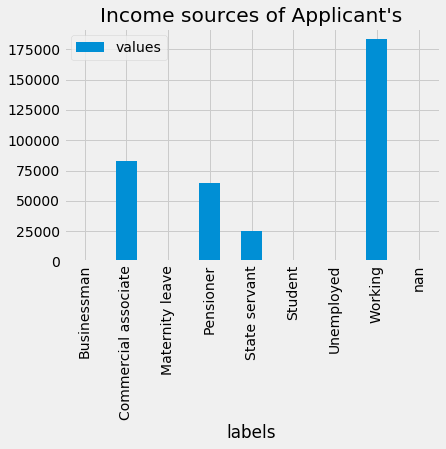

In [61]:
df_colors = df.filter(like='NAME_INCOME_TYPE')
coluumn_list=[]
value_list=[]
for (columnName, columnData) in df_colors.iteritems():
   coluumn_list.append(remove_prefix(columnName,'NAME_INCOME_TYPE_'))
   value_list.append(columnData.value_counts().get(key=1))

print(value_list) 

df_new = pd.DataFrame({'labels': coluumn_list,
                   'values': value_list
                  })
print(df_new)
df_new.plot.bar(x="labels", y="values", rot=90, title="Income sources of Applicant\'s")

[34035, 228712, 22725, 52480, 2, 18297, None]
                 labels    values
0        Civil marriage   34035.0
1               Married  228712.0
2             Separated   22725.0
3  Single / not married   52480.0
4               Unknown       2.0
5                 Widow   18297.0
6                   nan       NaN


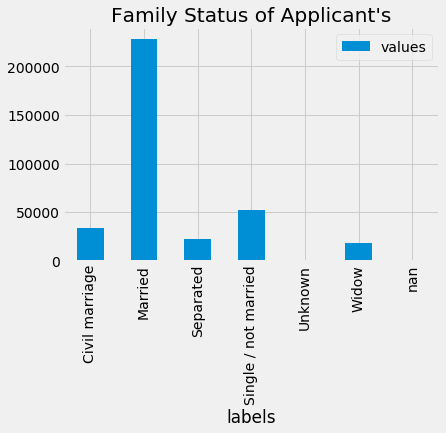

In [62]:
df_colors = df.filter(like='NAME_FAMILY_STATUS')
coluumn_list=[]
value_list=[]
for (columnName, columnData) in df_colors.iteritems():
   coluumn_list.append(remove_prefix(columnName,'NAME_FAMILY_STATUS_'))
   value_list.append(columnData.value_counts().get(key=1))

print(value_list) 

df_new = pd.DataFrame({'labels': coluumn_list,
                   'values': value_list
                  })
print(df_new)
df_new.plot.bar(x="labels", y="values", rot=90, title="Family Status of Applicant\'s")

[11441, 5309, 6840, 31930, 21376, 667, 13234, 607, 63841, 2364, 24945, 9853, 3107, 889, 37174, 1518, 7636, 1526, 111994]
                   labels  values
7                IT staff     607
5                HR staff     667
13          Realty agents     889
15            Secretaries    1518
17   Waiters/barmen staff    1526
9      Low-skill Laborers    2364
12  Private service staff    3107
1          Cleaning staff    5309
2           Cooking staff    6840
16         Security staff    7636
11         Medicine staff    9853
0             Accountants   11441
6   High skill tech staff   13234
4                 Drivers   21376
10               Managers   24945
3              Core staff   31930
14            Sales staff   37174
8                Laborers   63841
18                    nan  111994


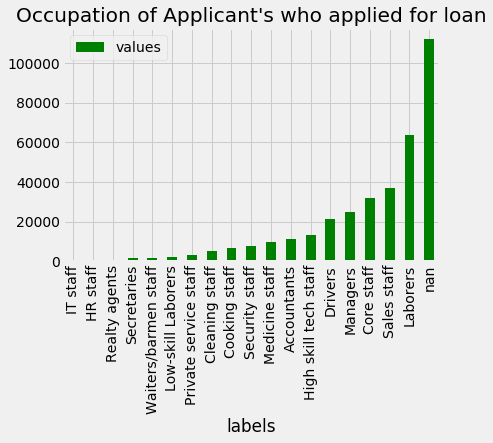

In [63]:
df_colors = df.filter(like='OCCUPATION_TYPE')
coluumn_list=[]
value_list=[]
for (columnName, columnData) in df_colors.iteritems():
   coluumn_list.append(remove_prefix(columnName,'OCCUPATION_TYPE_'))
   value_list.append(columnData.value_counts().get(key=1))

print(value_list) 

df_new = pd.DataFrame({'labels': coluumn_list,
                   'values': value_list
                  })
df_new = df_new.sort_values('values') #sort
print(df_new)
df_new.plot.bar(x="labels", y="values", rot=90, color = 'green',title="Occupation of Applicant\'s who applied for loan")

[205, 87378, 12000, 4291, 252377, None]
                          labels    values
0                Academic degree     205.0
3                Lower secondary    4291.0
2              Incomplete higher   12000.0
1               Higher education   87378.0
4  Secondary / secondary special  252377.0
5                            nan       NaN


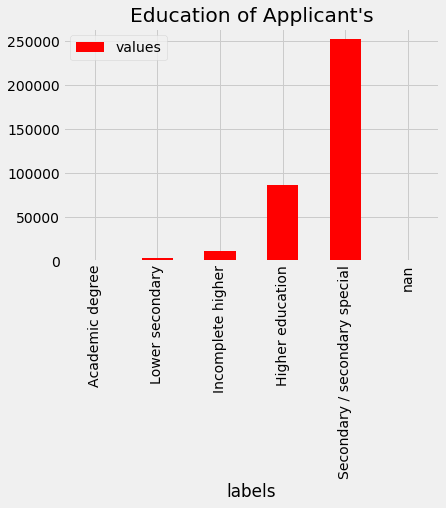

In [64]:
df_colors = df.filter(like='NAME_EDUCATION_TYPE')
coluumn_list=[]
value_list=[]
for (columnName, columnData) in df_colors.iteritems():
   coluumn_list.append(remove_prefix(columnName,'NAME_EDUCATION_TYPE_'))
   value_list.append(columnData.value_counts().get(key=1))

print(value_list) 

df_new = pd.DataFrame({'labels': coluumn_list,
                   'values': value_list
                  })
df_new = df_new.sort_values('values') #sort
print(df_new)
df_new.plot.bar(x="labels", y="values", rot=90, color = 'red',title="Education of Applicant\'s")

[1245, 316510, 12799, 3024, 5599, 17074, None]
                labels    values
0      Co-op apartment    1245.0
3     Office apartment    3024.0
4     Rented apartment    5599.0
2  Municipal apartment   12799.0
5         With parents   17074.0
1    House / apartment  316510.0
6                  nan       NaN


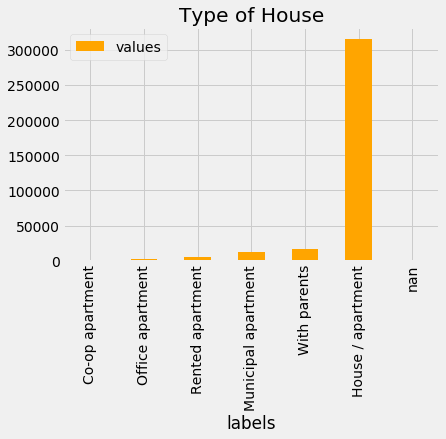

In [65]:
df_colors = df.filter(like='NAME_HOUSING_TYPE')
coluumn_list=[]
value_list=[]
for (columnName, columnData) in df_colors.iteritems():
   coluumn_list.append(remove_prefix(columnName,'NAME_HOUSING_TYPE_'))
   value_list.append(columnData.value_counts().get(key=1))

print(value_list) 

df_new = pd.DataFrame({'labels': coluumn_list,
                   'values': value_list
                  })
df_new = df_new.sort_values('values') #sort
print(df_new)
df_new.plot.bar(x="labels", y="values", rot=90, color = 'orange',title="Type of House")

[500, 2746, 2881, 6870, 12032, 78832, 303, 7760, 440, 1106, 651, 11912, 1100, 3393, 1217, 133, 3120, 446, 73, 535, 3766, 1044, 696, 139, 1524, 27, 3867, 677, 7917, 358, 12908, 3164, 362, 19390, 2782, 2451, 468, 97, 2095, 10180, 3719, 2315, 44332, 1877, 672, 412, 2142, 4070, 78, 58, 753, 9134, 236, 2652, 1361, 6282, 1548, 64648, None]
                    labels   values
25        Industry: type 8     27.0
49           Trade: type 5     58.0
18       Industry: type 13     73.0
48           Trade: type 4     78.0
37                Religion     97.0
15       Industry: type 10    133.0
23        Industry: type 6    139.0
52       Transport: type 1    236.0
6                 Cleaning    303.0
29          Legal Services    358.0
32                  Mobile    362.0
45           Trade: type 1    412.0
8                  Culture    440.0
17       Industry: type 12    446.0
36                 Realtor    468.0
0              Advertising    500.0
19        Industry: type 2    535.0
10              

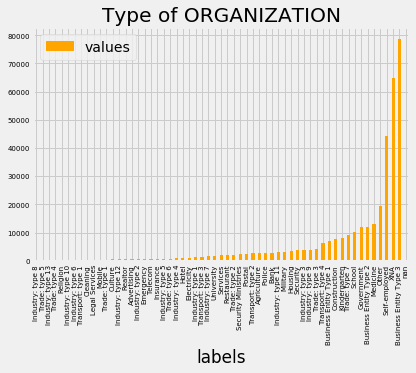

In [90]:

df_colors = df.filter(like='ORGANIZATION_TYPE')
coluumn_list=[]
value_list=[]
for (columnName, columnData) in df_colors.iteritems():
   coluumn_list.append(remove_prefix(columnName,'ORGANIZATION_TYPE_'))
   value_list.append(columnData.value_counts().get(key=1))

print(value_list) 

df_new = pd.DataFrame({'labels': coluumn_list,
                   'values': value_list
                  })
df_new = df_new.sort_values('values') #sort
print(df_new)
fig, ax = plt.subplots()

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=7)
ax.tick_params(axis='both', which='minor', labelsize=8)
df_new.plot.bar(x="labels",ax=ax, y="values", rot=90, color = 'orange',title="Type of ORGANIZATION")


          business_name   success    failure
0               Working  4.950717  46.681257
1  Commercial associate  1.743027  21.546221
2             Pensioner  0.969721  17.033537
3         State servant  0.406164   6.651469
4            Unemployed  0.002602   0.004553
5               Student  0.000000   0.005853
6           Businessman  0.000000   0.003252
7       Maternity leave  0.000650   0.000976


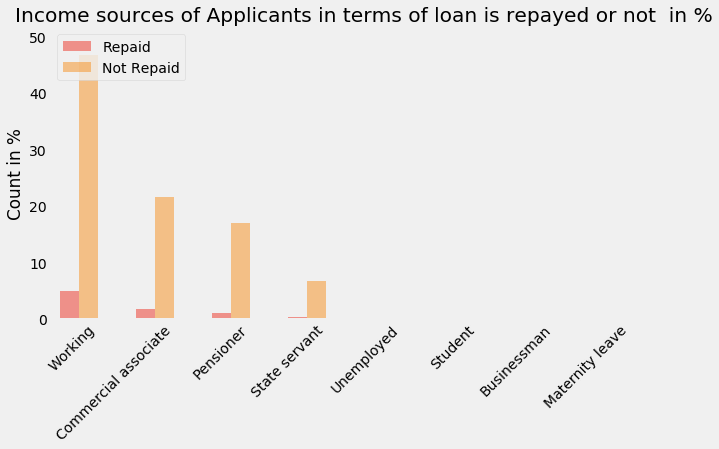

In [67]:
application_train= pd.read_csv('../input/application_train.csv')
temp = application_train["NAME_INCOME_TYPE"].value_counts()

#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_train["TARGET"][application_train["NAME_INCOME_TYPE"]==val] == 1))
    temp_y0.append(np.sum(application_train["TARGET"][application_train["NAME_INCOME_TYPE"]==val] == 0))    
trace1 = pd.DataFrame((temp_y1 / temp.sum()) * 100, index = temp.index)
trace2 = pd.DataFrame((temp_y0 / temp.sum()) * 100, index=temp.index)

groups=[(temp_y1 / temp.sum()) * 100,(temp_y0 / temp.sum()) * 100]
group_labels = [list(temp.index),list(temp.index)]


    # Create dataframe
raw_data = {'business_name': list(temp.index),
                'success': (temp_y1 / temp.sum()) * 100,
                'failure': (temp_y0 / temp.sum()) * 100}
df1 = pd.DataFrame(raw_data, columns = ['business_name', 'success', 'failure'])
print(); print(df1)

    # Setting the positions and width for the bars
pos = list(range(len(df1['success'])))
width = 0.25

    # Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with pre_score data
plt.bar(pos, df1['success'], width, alpha=0.5, color='#EE3224')
    #plt.show()

plt.bar([p + width for p in pos], df1['failure'], width, alpha=0.5, color='#F78F1E')
    #plt.show()


    # Set the y axis label
ax.set_ylabel('Count in %')

    # Set the chart's title
ax.set_title('Income sources of Applicants in terms of loan is repayed or not  in %')

    # Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
ax.set_xticklabels(df1['business_name'])

    # Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df1['success'] + df1['failure'] )] )

    # Adding the legend and showing the plot
plt.legend(['Repaid', 'Not Repaid'], loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.grid()
plt.show()


          business_name   success    failure
0               Married  4.829096  59.048945
1  Single / not married  1.449379  13.328629
2        Civil marriage  0.962892   8.719688
3             Separated  0.526810   5.902228
4                 Widow  0.304705   4.926978
5               Unknown  0.000000   0.000650


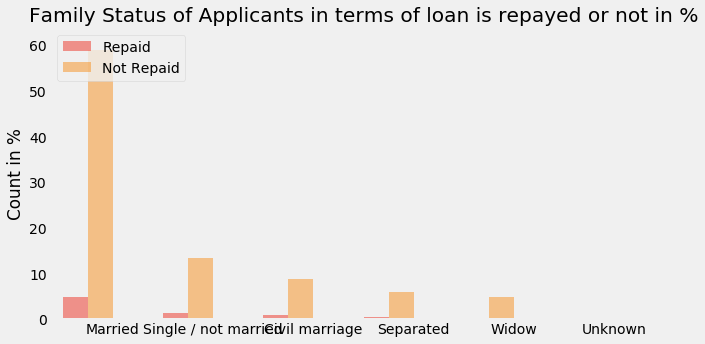

In [68]:
temp = application_train["NAME_FAMILY_STATUS"].value_counts()

#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_train["TARGET"][application_train["NAME_FAMILY_STATUS"]==val] == 1))
    temp_y0.append(np.sum(application_train["TARGET"][application_train["NAME_FAMILY_STATUS"]==val] == 0))    
trace1 = pd.DataFrame((temp_y1 / temp.sum()) * 100, index = temp.index)
trace2 = pd.DataFrame((temp_y0 / temp.sum()) * 100, index=temp.index)

groups=[(temp_y1 / temp.sum()) * 100,(temp_y0 / temp.sum()) * 100]
group_labels = [list(temp.index),list(temp.index)]


    # Create dataframe
raw_data = {'business_name': list(temp.index),
                'success': (temp_y1 / temp.sum()) * 100,
                'failure': (temp_y0 / temp.sum()) * 100}
df1 = pd.DataFrame(raw_data, columns = ['business_name', 'success', 'failure'])
print(); print(df1)

    # Setting the positions and width for the bars
pos = list(range(len(df1['success'])))
width = 0.25

    # Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with pre_score data
plt.bar(pos, df1['success'], width, alpha=0.5, color='#EE3224')
    #plt.show()

plt.bar([p + width for p in pos], df1['failure'], width, alpha=0.5, color='#F78F1E')
    #plt.show()


    # Set the y axis label
ax.set_ylabel('Count in %')

    # Set the chart's title
ax.set_title('Family Status of Applicants in terms of loan is repayed or not in %')

    # Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
ax.set_xticklabels(df1['business_name'])

    # Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df1['success'] + df1['failure'] )] )

    # Adding the legend and showing the plot
plt.legend(['Repaid', 'Not Repaid'], loc='upper left')
plt.grid()
plt.show()


            business_name   success    failure
0                Laborers  2.765252  23.374384
1             Sales staff  1.464570  13.741000
2              Core staff  0.823228  12.235695
3                Managers  0.629026   9.493653
4                 Drivers  0.998011   7.813566
5   High skill tech staff  0.332039   5.058261
6             Accountants  0.224517   4.423551
7          Medicine staff  0.270936   3.772736
8          Security staff  0.341986   2.841512
9           Cooking staff  0.294146   2.522262
10         Cleaning staff  0.211728   1.992232
11  Private service staff  0.082891   1.173266
12     Low-skill Laborers  0.170045   0.821334
13   Waiters/barmen staff  0.071997   0.566502
14            Secretaries  0.043577   0.574555
15          Realty agents  0.027946   0.327776
16               HR staff  0.017052   0.249621
17               IT staff  0.016105   0.233043


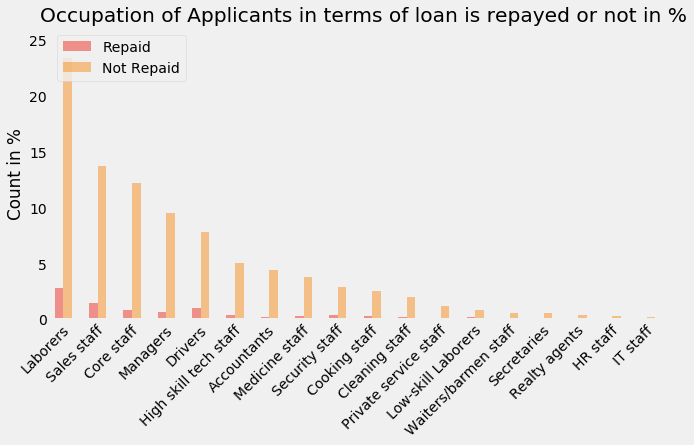

In [69]:
temp = application_train["OCCUPATION_TYPE"].value_counts()

#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_train["TARGET"][application_train["OCCUPATION_TYPE"]==val] == 1))
    temp_y0.append(np.sum(application_train["TARGET"][application_train["OCCUPATION_TYPE"]==val] == 0))    
trace1 = pd.DataFrame((temp_y1 / temp.sum()) * 100, index = temp.index)
trace2 = pd.DataFrame((temp_y0 / temp.sum()) * 100, index=temp.index)

groups=[(temp_y1 / temp.sum()) * 100,(temp_y0 / temp.sum()) * 100]
group_labels = [list(temp.index),list(temp.index)]


    # Create dataframe
raw_data = {'business_name': list(temp.index),
                'success': (temp_y1 / temp.sum()) * 100,
                'failure': (temp_y0 / temp.sum()) * 100}
df1 = pd.DataFrame(raw_data, columns = ['business_name', 'success', 'failure'])
print(); print(df1)

    # Setting the positions and width for the bars
pos = list(range(len(df1['success'])))
width = 0.25

    # Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with pre_score data
plt.bar(pos, df1['success'], width, alpha=0.5, color='#EE3224')
    #plt.show()

plt.bar([p + width for p in pos], df1['failure'], width, alpha=0.5, color='#F78F1E')
    #plt.show()


    # Set the y axis label
ax.set_ylabel('Count in %')

    # Set the chart's title
ax.set_title('Occupation of Applicants in terms of loan is repayed or not in %')

    # Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
ax.set_xticklabels(df1['business_name'])

    # Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df1['success'] + df1['failure'] )] )

    # Adding the legend and showing the plot
plt.legend(['Repaid', 'Not Repaid'], loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.grid()
plt.show()


                   business_name   success    failure
0  Secondary / secondary special  6.349041  64.669882
1               Higher education  1.303693  23.041127
2              Incomplete higher  0.283567   3.058427
3                Lower secondary  0.135605   1.105326
4                Academic degree  0.000976   0.052356


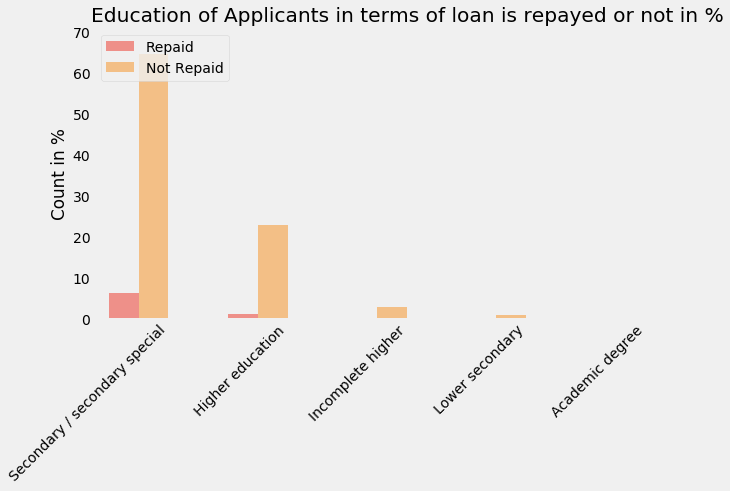

In [70]:
temp = application_train["NAME_EDUCATION_TYPE"].value_counts()

#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_train["TARGET"][application_train["NAME_EDUCATION_TYPE"]==val] == 1))
    temp_y0.append(np.sum(application_train["TARGET"][application_train["NAME_EDUCATION_TYPE"]==val] == 0))    
trace1 = pd.DataFrame((temp_y1 / temp.sum()) * 100, index = temp.index)
trace2 = pd.DataFrame((temp_y0 / temp.sum()) * 100, index=temp.index)

groups=[(temp_y1 / temp.sum()) * 100,(temp_y0 / temp.sum()) * 100]
group_labels = [list(temp.index),list(temp.index)]


    # Create dataframe
raw_data = {'business_name': list(temp.index),
                'success': (temp_y1 / temp.sum()) * 100,
                'failure': (temp_y0 / temp.sum()) * 100}
df1 = pd.DataFrame(raw_data, columns = ['business_name', 'success', 'failure'])
print(); print(df1)

    # Setting the positions and width for the bars
pos = list(range(len(df1['success'])))
width = 0.25

    # Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with pre_score data
plt.bar(pos, df1['success'], width, alpha=0.5, color='#EE3224')
    #plt.show()

plt.bar([p + width for p in pos], df1['failure'], width, alpha=0.5, color='#F78F1E')
    #plt.show()


    # Set the y axis label
ax.set_ylabel('Count in %')

    # Set the chart's title
ax.set_title('Education of Applicants in terms of loan is repayed or not in %')

    # Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
ax.set_xticklabels(df1['business_name'])

    # Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df1['success'] + df1['failure'] )] )

    # Adding the legend and showing the plot
plt.legend(['Repaid', 'Not Repaid'], loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.grid()
plt.show()


         business_name   success    failure
0    House / apartment  6.917476  81.816911
1         With parents  0.564533   4.261311
2  Municipal apartment  0.310558   3.326060
3     Rented apartment  0.195440   1.391820
4     Office apartment  0.055933   0.795094
5      Co-op apartment  0.028942   0.335923


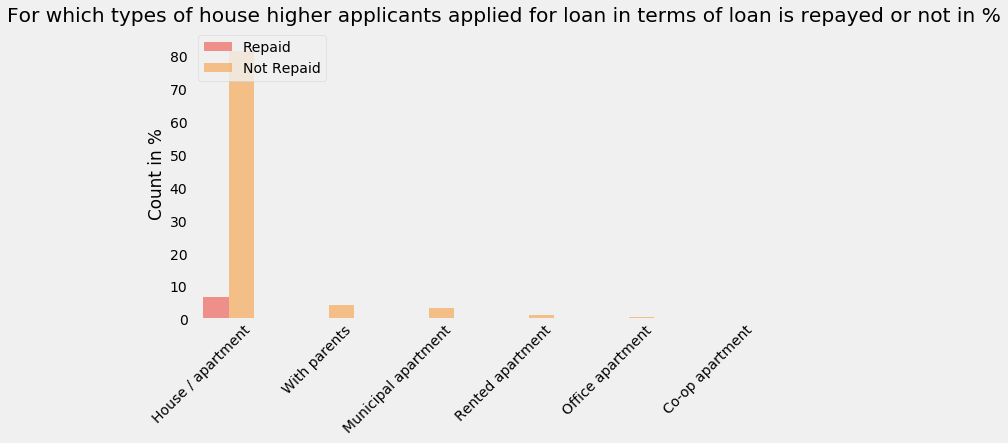

In [71]:
temp = application_train["NAME_HOUSING_TYPE"].value_counts()

#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_train["TARGET"][application_train["NAME_HOUSING_TYPE"]==val] == 1))
    temp_y0.append(np.sum(application_train["TARGET"][application_train["NAME_HOUSING_TYPE"]==val] == 0))    
trace1 = pd.DataFrame((temp_y1 / temp.sum()) * 100, index = temp.index)
trace2 = pd.DataFrame((temp_y0 / temp.sum()) * 100, index=temp.index)

groups=[(temp_y1 / temp.sum()) * 100,(temp_y0 / temp.sum()) * 100]
group_labels = [list(temp.index),list(temp.index)]


    # Create dataframe
raw_data = {'business_name': list(temp.index),
                'success': (temp_y1 / temp.sum()) * 100,
                'failure': (temp_y0 / temp.sum()) * 100}
df1 = pd.DataFrame(raw_data, columns = ['business_name', 'success', 'failure'])
print(); print(df1)

    # Setting the positions and width for the bars
pos = list(range(len(df1['success'])))
width = 0.25

    # Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with pre_score data
plt.bar(pos, df1['success'], width, alpha=0.5, color='#EE3224')
    #plt.show()

plt.bar([p + width for p in pos], df1['failure'], width, alpha=0.5, color='#F78F1E')
    #plt.show()


    # Set the y axis label
ax.set_ylabel('Count in %')

    # Set the chart's title
ax.set_title('For which types of house higher applicants applied for loan in terms of loan is repayed or not in %')

    # Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
ax.set_xticklabels(df1['business_name'])

    # Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df1['success'] + df1['failure'] )] )

    # Adding the legend and showing the plot
plt.legend(['Repaid', 'Not Repaid'], loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.grid()
plt.show()


             business_name   success    failure
0   Business Entity Type 3  2.056187  20.054242
1                      XNA  0.972323  17.034838
2            Self-employed  1.270849  11.220412
3                    Other  0.414619   5.010552
4                 Medicine  0.239666   3.400204
5   Business Entity Type 2  0.292672   3.139075
6               Government  0.236089   3.147204
7                   School  0.171051   2.720878
8            Trade: type 7  0.240642   2.305934
9             Kindergarten  0.157393   2.079926
10            Construction  0.255275   1.930337
11  Business Entity Type 1  0.158368   1.787578
12       Transport: type 4  0.162921   1.592463
13           Trade: type 3  0.117394   1.018175
14        Industry: type 9  0.073168   1.022077
15        Industry: type 3  0.113167   0.952811
16                Security  0.105362   0.950535
17                 Housing  0.076420   0.885497
18       Industry: type 11  0.076095   0.803223
19                Military  0.043901   

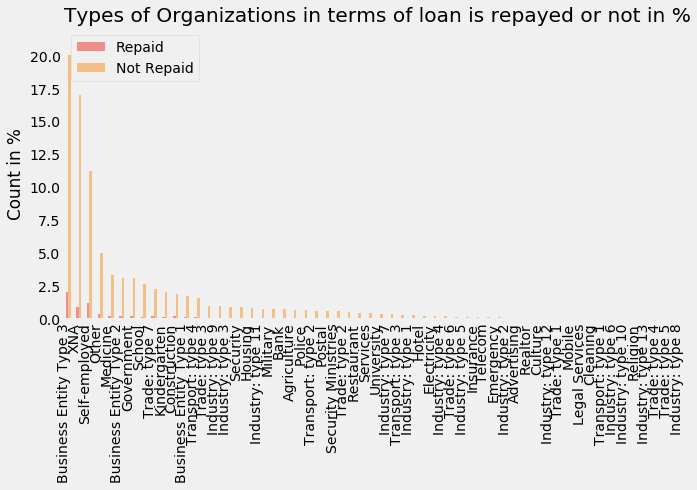

In [72]:
temp = application_train["ORGANIZATION_TYPE"].value_counts()

#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_train["TARGET"][application_train["ORGANIZATION_TYPE"]==val] == 1))
    temp_y0.append(np.sum(application_train["TARGET"][application_train["ORGANIZATION_TYPE"]==val] == 0))    
trace1 = pd.DataFrame((temp_y1 / temp.sum()) * 100, index = temp.index)
trace2 = pd.DataFrame((temp_y0 / temp.sum()) * 100, index=temp.index)

groups=[(temp_y1 / temp.sum()) * 100,(temp_y0 / temp.sum()) * 100]
group_labels = [list(temp.index),list(temp.index)]


    # Create dataframe
raw_data = {'business_name': list(temp.index),
                'success': (temp_y1 / temp.sum()) * 100,
                'failure': (temp_y0 / temp.sum()) * 100}
df1 = pd.DataFrame(raw_data, columns = ['business_name', 'success', 'failure'])
print(); print(df1)

    # Setting the positions and width for the bars
pos = list(range(len(df1['success'])))
width = 0.25

    # Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with pre_score data
plt.bar(pos, df1['success'], width, alpha=0.5, color='#EE3224')
    #plt.show()

plt.bar([p + width for p in pos], df1['failure'], width, alpha=0.5, color='#F78F1E')
    #plt.show()


    # Set the y axis label
ax.set_ylabel('Count in %')

    # Set the chart's title
ax.set_title('Types of Organizations in terms of loan is repayed or not in %')

    # Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
ax.set_xticklabels(df1['business_name'])

    # Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df1['success'] + df1['failure'] )] )

    # Adding the legend and showing the plot
plt.legend(['Repaid', 'Not Repaid'], loc='upper left')
plt.xticks(rotation=90, ha='right')

plt.grid()
plt.show()

[13257, 109781, 1691, None]
            labels    values
2  Revolving loans    1691.0
0       Cash loans   13257.0
1   Consumer loans  109781.0
3              XNA       NaN


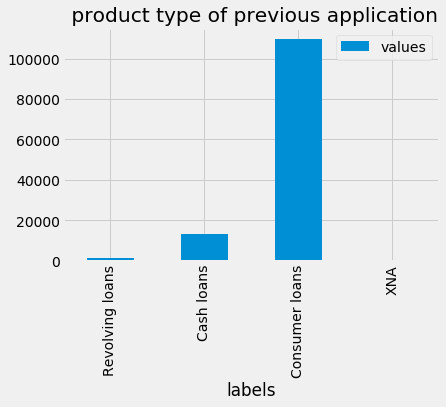

In [84]:
df_colors = df.filter(like='p_NAME_CONTRACT_TYPE')
coluumn_list=[]
value_list=[]
for (columnName, columnData) in df_colors.iteritems():
   coluumn_list.append(remove_prefix(columnName,'p_NAME_CONTRACT_TYPE_'))
   value_list.append(columnData.value_counts().get(key=1))

print(value_list) 

df_new = pd.DataFrame({'labels': coluumn_list,
                   'values': value_list
                  })
df_new = df_new.sort_values('values') #sort
print(df_new)

df_new.plot.bar(x="labels", y="values", rot=90, title=" product type of previous application")

[10896, 10595, 14060, 11076, 10838, 10678, 10966]
      labels  values
1     MONDAY   10595
5    TUESDAY   10678
4   THURSDAY   10838
0     FRIDAY   10896
6  WEDNESDAY   10966
3     SUNDAY   11076
2   SATURDAY   14060


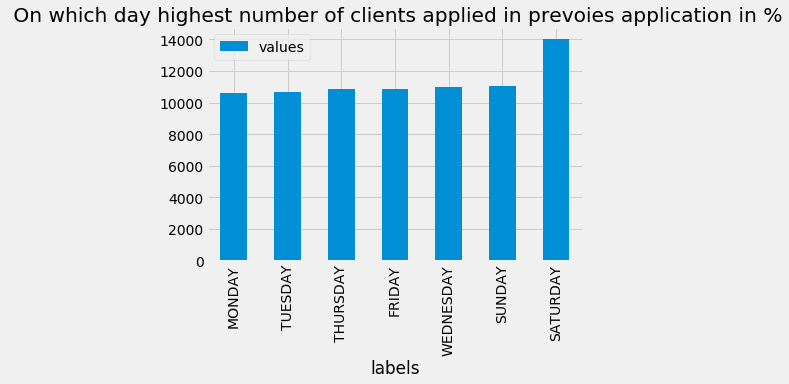

In [86]:
df_colors = df.filter(like='p_WEEKDAY_APPR_PROCESS_START_')
coluumn_list=[]
value_list=[]
for (columnName, columnData) in df_colors.iteritems():
   coluumn_list.append(remove_prefix(columnName,'p_WEEKDAY_APPR_PROCESS_START_'))
   value_list.append(columnData.value_counts().get(key=1))

print(value_list) 

df_new = pd.DataFrame({'labels': coluumn_list,
                   'values': value_list
                  })
df_new = df_new.sort_values('values') #sort
print(df_new)

df_new.plot.bar(x="labels", y="values", rot=90, title=" On which day highest number of clients applied in prevoies application in %")

[63, 13, 2, 12, 17, 20, 68, 43, 40, 74, 30, 11, 1, 42, 86, 2, 456, 9, 43, 1, 757, 323, 35, 138032, 7365]
                              labels  values
12                             Hobby       1
19          Refusal to name the goal       1
2                    Buying a garage       2
15          Money for a third person       2
17           Payments on other loans       9
11       Gasification / water supply      11
3       Buying a holiday home / land      12
1               Business development      13
4                      Buying a home      17
5                   Buying a new car      20
10                         Furniture      30
22          Wedding / gift / holiday      35
8                          Education      40
13                           Journey      42
7                        Car repairs      43
18  Purchase of electronic equipment      43
0       Building a house or an annex      63
6                  Buying a used car      68
9                  Everyday expenses    

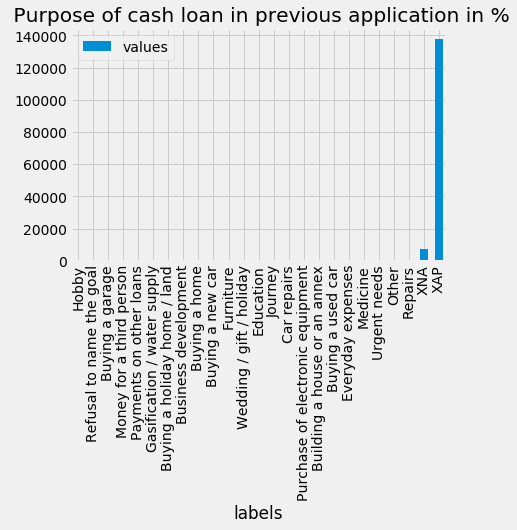

In [87]:
df_colors = df.filter(like='p_NAME_CASH_LOAN_PURPOSE_')
coluumn_list=[]
value_list=[]
for (columnName, columnData) in df_colors.iteritems():
   coluumn_list.append(remove_prefix(columnName,'p_NAME_CASH_LOAN_PURPOSE_'))
   value_list.append(columnData.value_counts().get(key=1))

print(value_list) 

df_new = pd.DataFrame({'labels': coluumn_list,
                   'values': value_list
                  })
df_new = df_new.sort_values('values') #sort
print(df_new)

df_new.plot.bar(x="labels", y="values", rot=90, title=" Purpose of cash loan in previous application in %")

[144615, 255, 499, 175]
         labels  values
3  Unused offer     175
1      Canceled     255
2       Refused     499
0      Approved  144615


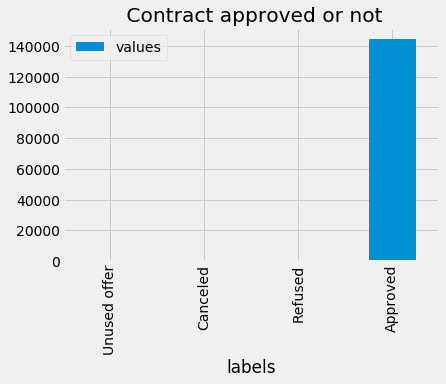

In [89]:
df_colors = df.filter(like='p_NAME_CONTRACT_STATUS_')
coluumn_list=[]
value_list=[]
for (columnName, columnData) in df_colors.iteritems():
   coluumn_list.append(remove_prefix(columnName,'p_NAME_CONTRACT_STATUS_'))
   value_list.append(columnData.value_counts().get(key=1))

print(value_list) 

df_new = pd.DataFrame({'labels': coluumn_list,
                   'values': value_list
                  })
df_new = df_new.sort_values('values') #sort
print(df_new)

df_new.plot.bar(x="labels", y="values", rot=90, title=" Contract approved or not")

[1527, 104, 234, 2225, 630, 1053, 112, 375, 540, 24355, 6887, 11931, 1534, 19062, 2678, 2879, 361]
                            labels  values
1                      Card X-Sell     104
6                Cash X-Sell: high     112
2                             Cash     234
16     POS others without interest     361
7                 Cash X-Sell: low     375
8              Cash X-Sell: middle     540
4                 Cash Street: low     630
5              Cash Street: middle    1053
0                      Card Street    1527
12   POS industry without interest    1534
3                Cash Street: high    2225
14     POS mobile without interest    2678
15         POS other with interest    2879
10  POS household without interest    6887
11      POS industry with interest   11931
13        POS mobile with interest   19062
9      POS household with interest   24355


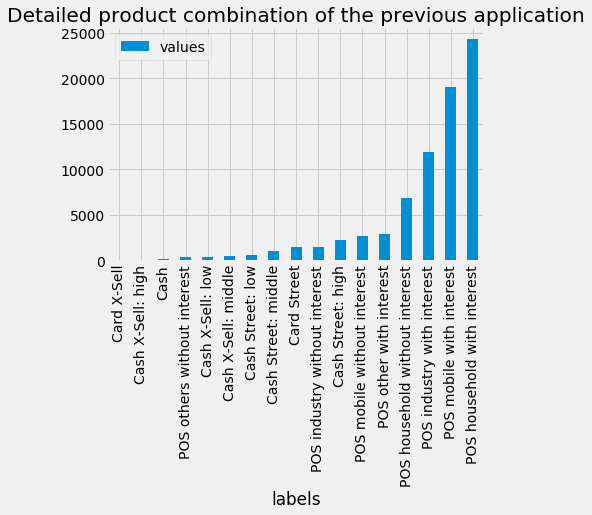

In [92]:
df_colors = df.filter(like='p_PRODUCT_COMBINATION_')
coluumn_list=[]
value_list=[]
for (columnName, columnData) in df_colors.iteritems():
   coluumn_list.append(remove_prefix(columnName,'p_PRODUCT_COMBINATION_'))
   value_list.append(columnData.value_counts().get(key=1))

print(value_list) 

df_new = pd.DataFrame({'labels': coluumn_list,
                   'values': value_list
                  })
df_new = df_new.sort_values('values') #sort
print(df_new)

df_new.plot.bar(x="labels", y="values", rot=90, title="Detailed product combination of the previous application")

[114980, 52, 567, 18194]
                                      labels  values
1  Cashless from the account of the employer      52
2                 Non-cash from your account     567
3                                        XNA   18194
0                      Cash through the bank  114980


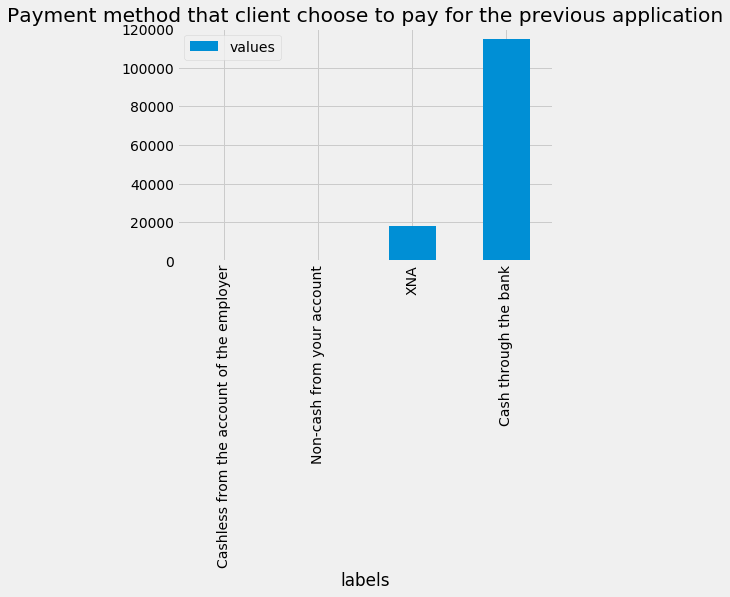

In [93]:
df_colors = df.filter(like='p_NAME_PAYMENT_TYPE_')
coluumn_list=[]
value_list=[]
for (columnName, columnData) in df_colors.iteritems():
   coluumn_list.append(remove_prefix(columnName,'p_NAME_PAYMENT_TYPE_'))
   value_list.append(columnData.value_counts().get(key=1))

print(value_list) 

df_new = pd.DataFrame({'labels': coluumn_list,
                   'values': value_list
                  })
df_new = df_new.sort_values('values') #sort
print(df_new)

df_new.plot.bar(x="labels", y="values", rot=90, title="Payment method that client choose to pay for the previous application")

[175, 253, 51, 134, 1, 1, 6, 208837, 7]
   labels  values
4   SCOFR       1
5  SYSTEM       1
6   VERIF       6
8     XNA       7
2   LIMIT      51
3     SCO     134
0  CLIENT     175
1      HC     253
7     XAP  208837


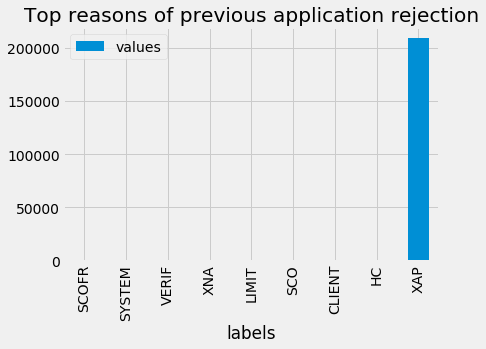

In [94]:
df_colors = df.filter(like='p_CODE_REJECT_REASON_')
coluumn_list=[]
value_list=[]
for (columnName, columnData) in df_colors.iteritems():
   coluumn_list.append(remove_prefix(columnName,'p_CODE_REJECT_REASON_'))
   value_list.append(columnData.value_counts().get(key=1))

print(value_list) 

df_new = pd.DataFrame({'labels': coluumn_list,
                   'values': value_list
                  })
df_new = df_new.sort_values('values') #sort
print(df_new)

df_new.plot.bar(x="labels", y="values", rot=90, title="Top reasons of previous application rejection")

[1590, 22, 500, 491, 56174, 12685, 11383, 23451]
                       labels  values
1                  Car dealer      22
3              Contact center     491
2  Channel of corporate sales     500
0             AP+ (Cash loan)    1590
6            Regional / Local   11383
5     Credit and cash offices   12685
7                       Stone   23451
4                Country-wide   56174


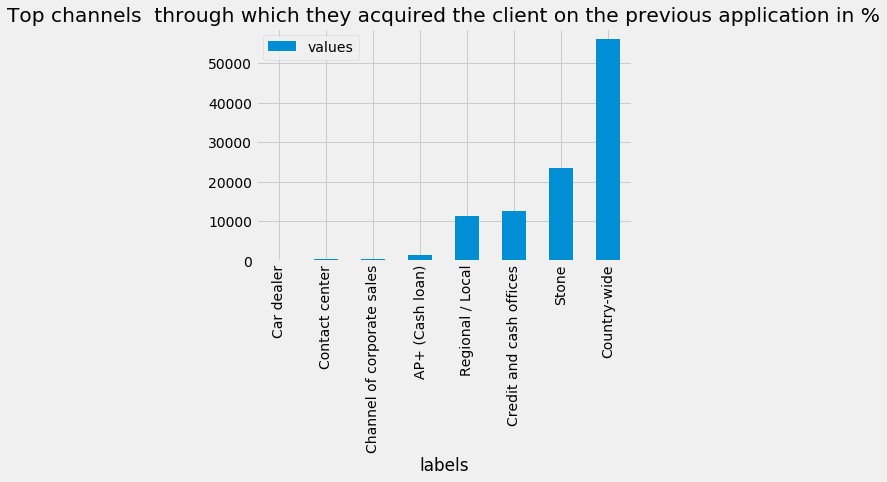

In [96]:
df_colors = df.filter(like='p_CHANNEL_TYPE_')
coluumn_list=[]
value_list=[]
for (columnName, columnData) in df_colors.iteritems():
   coluumn_list.append(remove_prefix(columnName,'p_CHANNEL_TYPE_'))
   value_list.append(columnData.value_counts().get(key=1))

print(value_list) 

df_new = pd.DataFrame({'labels': coluumn_list,
                   'values': value_list
                  })
df_new = df_new.sort_values('values') #sort
print(df_new)

df_new.plot.bar(x="labels", y="values", rot=90, title="Top channels  through which they acquired the client on the previous application in %")